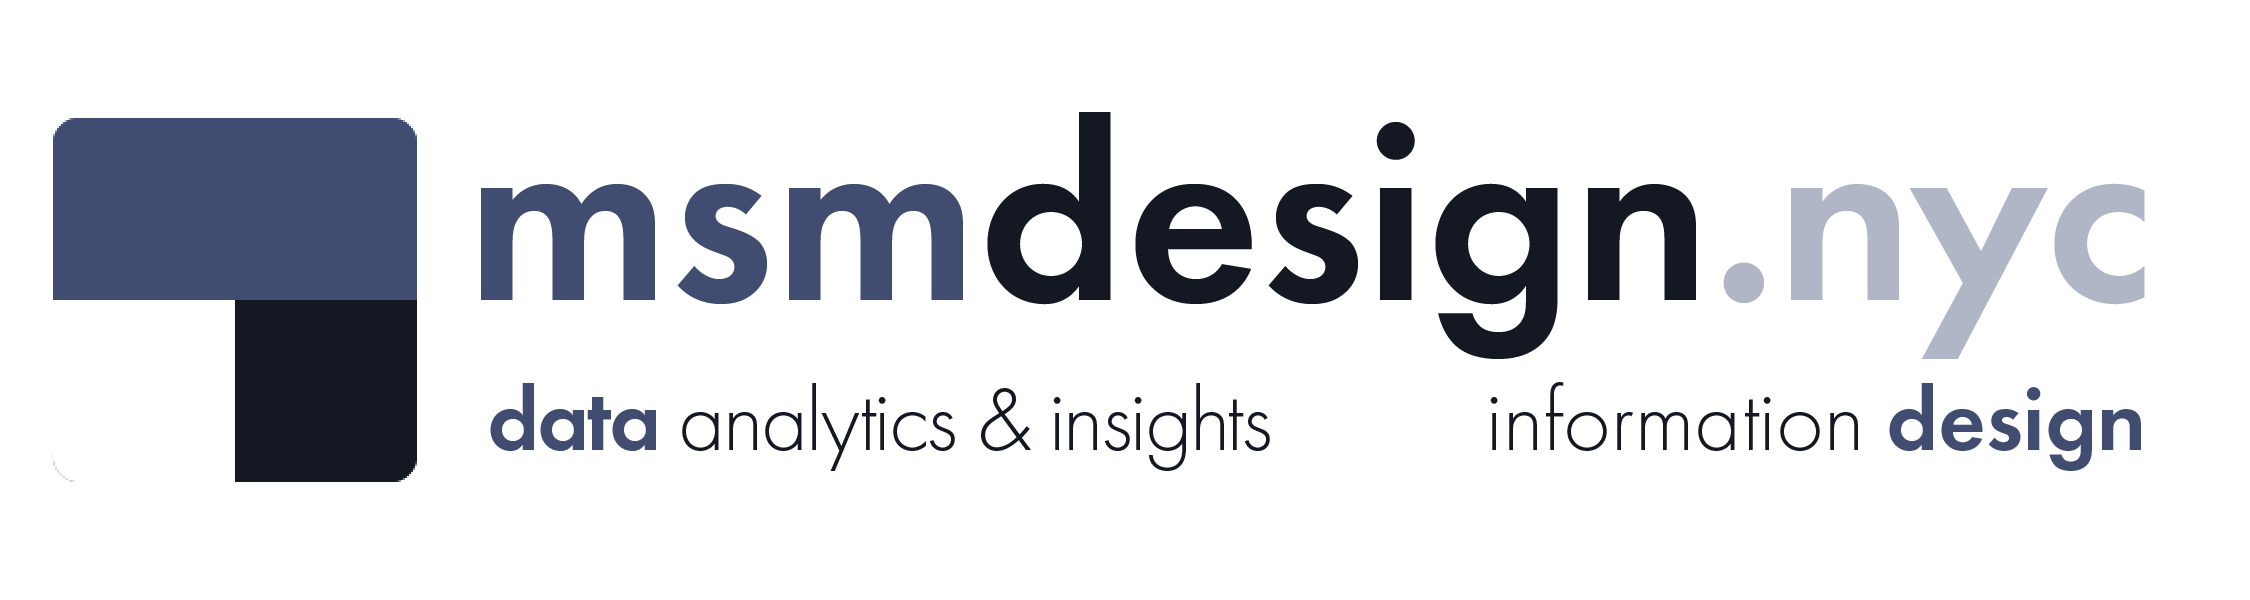

---
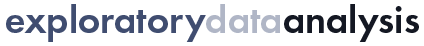

---

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.

---

# .nyc Domain Registrations

**Dataset Analyzed:** *Demographics by Community District*

**About This Dataset:** A list of all .nyc domains registered along with the registration date and registrant type. This list is updated daily. Data provided by Office of Technology and Innovation (OTI), The City of New York: https://data.cityofnewyork.us/Business/-nyc-Domain-Registrations/9cw8-7heb


**Acknowledgements:** NYC open Data https://opendata.cityofnewyork.us/


**EDA Catalogue Number:** INS-004


**EDA Publication Date:** Wednesday, January 4, 2023


**Language:** Python


**Libraries Used:** NumPy, pandas


**EDA Author:** David White


**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

---

## **0. Prepare the workspace**

### 0.1 Import Python libraries, packages and functions

In [2]:
# import libraries for data wrangling, aggregate functions and basic descriptive statistics
import numpy as np
import pandas as pd

# import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Adjust display options to make plots easier to read and understand

In [62]:
# specify seaborn styling options
sns.set_theme(
    context='talk', 
    style='whitegrid', 
    palette='viridis',
    font='Courier New', 
    font_scale=1.15)    

# allow plots to display inline within the notebook
%matplotlib inline

### 0.3 Set Markdown tables to align-left within notebook cells

In [4]:
%%html
<style>
table {float:left}
</style>

### 0.4 Load the raw data file into the notebook and visually confirm that it has been read in as expected

In [6]:
# load the data from a csv file (stored locally) into a new DataFrame object

csv = r"F:\Creative Cloud Files\MSM Client 001 - Mister Shepherd Media LLC\MSM Design\github_msm_design\exploratory-data-analysis\insights-made-fresh-daily\nyc-open-data\ins-004\data\nyc_Domain_Registrations.csv"

registrations = pd.read_csv(csv, encoding='utf-8')

In [8]:
# glimpse the first three rows

registrations.head(3)

,Domain Name,Domain Registration Date,Nexus Category
0,0-1.nyc,07/27/2017 02:24:15 PM,INDIV
1,000-00-0000.nyc,04/20/2019 07:56:46 PM,ORG
2,000.nyc,12/27/2016 05:01:47 AM,ORG


In [8]:
# glimpse the last three rows

registrations.tail(3)

,Domain Name,Domain Registration Date,Nexus Category
64730,zzp.nyc,09/29/2016 11:24:10 PM,INDIV
64731,zzz.nyc,06/26/2016 02:40:51 AM,ORG
64732,zzzz.nyc,05/19/2022 05:26:54 PM,INDIV


In [10]:
# glimpse ten randomly selected rows

registrations.sample(10, random_state=77)

,Domain Name,Domain Registration Date,Nexus Category
31688,knack.nyc,11/19/2014 06:53:25 PM,ORG
29934,jmf.nyc,10/08/2014 03:13:29 PM,INDIV
33565,liquidwealth.nyc,04/28/2020 10:15:38 PM,ORG
50853,seatgeek.nyc,06/28/2015 10:49:40 AM,ORG
7468,blank-family.nyc,10/26/2014 01:28:36 PM,INDIV
13977,cosmo.nyc,02/17/2019 02:28:40 AM,ORG
13590,constructionforeman.nyc,03/31/2017 06:09:50 PM,ORG
33464,lincproject.nyc,02/10/2015 04:15:33 PM,ORG
31597,kitchenshowroom.nyc,10/03/2014 03:49:00 PM,ORG
54873,studiozero.nyc,03/24/2020 10:43:26 PM,ORG


**The data has been loaded and has been read in as expected.**

### 0.5. Check the data type of each column

In [11]:
# display a listing of each of the DataFrame's columns and its data type

registrations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64733 entries, 0 to 64732
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Domain Name                64733 non-null  object
 1   Domain Registration Date   64733 non-null  object
 2   Nexus Category             64733 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


**All of the columns have been read in as *object* data type. We'll need to change the data type of some columns to a something more appropriate.**

### 0.6 Refer to the [data dictionary](https://data.cityofnewyork.us/Business/-nyc-Domain-Registrations/9cw8-7heb) and make sure that our DataFrame's data types match the source data. Reassign data types where needed.

In [15]:
# display a list of the data set's columns

registrations.columns

Index(['Domain Name ', 'Domain Registration Date ', 'Nexus Category'], dtype='object')

In [16]:
# rename the columns to remove trailing spaces

registrations.columns = ['Domain Name', 'Domain Registration Date', 'Nexus Category']

In [17]:
# confirm that the renaming was successful

registrations.columns

Index(['Domain Name', 'Domain Registration Date', 'Nexus Category'], dtype='object')

In [18]:
# cast column to datetime data type

registrations['Domain Registration Date'] = pd.to_datetime(registrations['Domain Registration Date'], errors='coerce')

In [19]:
# cast column to categorical data type

registrations['Nexus Category'] = registrations['Nexus Category'].astype('category')

In [20]:
# display the DataFrame info once again to confirm that the data type changes have been made

registrations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64733 entries, 0 to 64732
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Domain Name               64733 non-null  object        
 1   Domain Registration Date  64733 non-null  datetime64[ns]
 2   Nexus Category            64733 non-null  category      
dtypes: category(1), datetime64[ns](1), object(1)
memory usage: 1.0+ MB


---

## **1. Describe the characteristics of the dataset**

### 1.1 How many rows and how many columns are in our data set?

In [21]:
# display the number of rows and columns in the DataFrame

rows = registrations.shape[0]
columns = registrations.shape[1]

print(f'There are {rows} rows and {columns} columns in the dataset.')

There are 64733 rows and 3 columns in the dataset.


### 1.2 Identify the index of our DataFrame

In [22]:
# display the index of the DataFrame

registrations.index

RangeIndex(start=0, stop=64733, step=1)

Our DataFrame has an interger index. We know from the data dictionary that each row is an individual website domain registration.

### 1.3 What are the column headings in our dataset?

In [23]:
# display a list of the DataFrame's columns

all_cols = list(registrations.columns)
print(all_cols)

['Domain Name', 'Domain Registration Date', 'Nexus Category']


### 1.4 What are the data types of each column?

In [24]:
# display the data type of each column in the DataFrame

registrations.dtypes

Domain Name                         object
Domain Registration Date    datetime64[ns]
Nexus Category                    category
dtype: object

### 1.5 How many null values are in each column?

In [25]:
# display the number of missing values in each column of the DataFrame

registrations.isna().sum()

Domain Name                 0
Domain Registration Date    0
Nexus Category              0
dtype: int64

### 1.6 How many unique values are there in each column?

In [26]:
# display the count of unique elements in each column

registrations.nunique(axis=0, dropna=True)

Domain Name                 64733
Domain Registration Date    51095
Nexus Category                  2
dtype: int64

---

## **2. Summarize the contents of the dataset**

### 2.1 Summarize the columns containing datetime variables

In [27]:
# summarize the data contained in columns with the 'datetime' data type only

registrations.describe(datetime_is_numeric=True) 

,Domain Registration Date
count,64733
mean,2017-07-05 22:11:12.457942528
min,2013-08-09 22:39:30
25%,2014-10-29 19:02:28
50%,2016-10-07 15:16:16
75%,2020-01-12 17:34:15
max,2022-08-07 22:17:26


### 2.2 Summarize the columns containing categorical variables

In [28]:
# summarize the data contained in columns with the 'category' data type only

registrations.describe(include=['category'])

,Nexus Category
count,64733
unique,2
top,ORG
freq,33076


---

---

## 3. **Describe and summarize the selected data**

### 3.1 Explore individual Series in the DataFrame

In [31]:
# what is the distribution of registrations by Nexus Category?

registrations['Nexus Category'].value_counts()

ORG      33076
INDIV    31657
Name: Nexus Category, dtype: int64

In [32]:
registrations['Nexus Category'].value_counts(normalize=True)

ORG      0.51096
INDIV    0.48904
Name: Nexus Category, dtype: float64

In [34]:
# what is the range of registration dates represented in the data set?

print(registrations['Domain Registration Date'].min())
print('to')
print(registrations['Domain Registration Date'].max())

2013-08-09 22:39:30
to
2022-08-07 22:17:26


In [35]:
# what is the distribution of registration dates?

registrations['Domain Registration Date'].value_counts(bins=10)

(2014-07-04 10:37:17.600000, 2015-05-28 22:35:05.200000]       24501
(2021-09-13 10:19:38.400000, 2022-08-07 22:17:26]               6630
(2020-10-19 22:21:50.800000, 2021-09-13 10:19:38.400000]        5282
(2016-04-21 10:32:52.800000, 2017-03-15 22:30:40.400000]        5198
(2015-05-28 22:35:05.200000, 2016-04-21 10:32:52.800000]        4975
(2019-11-26 10:24:03.200000, 2020-10-19 22:21:50.800000]        4956
(2019-01-01 22:26:15.600000, 2019-11-26 10:24:03.200000]        4373
(2018-02-07 10:28:28, 2019-01-01 22:26:15.600000]               4272
(2017-03-15 22:30:40.400000, 2018-02-07 10:28:28]               4237
(2013-08-06 15:49:07.323999999, 2014-07-04 10:37:17.600000]      309
Name: Domain Registration Date, dtype: int64

### 4.2 Explore the data set using groupby

In [41]:
# display the number of registrations by year

registrations.groupby(registrations['Domain Registration Date'].dt.year)['Domain Registration Date'].count()

Domain Registration Date
2013        1
2014    21155
2015     7139
2016     5667
2017     4770
2018     4750
2019     4941
2020     5444
2021     6548
2022     4318
Name: Domain Registration Date, dtype: int64

In [40]:
# display the number of registrations by year and Nexus Category

registrations.groupby([registrations['Domain Registration Date'].dt.year, 'Nexus Category'])['Domain Registration Date'].count()

Domain Registration Date  Nexus Category
2013                      INDIV                 0
                          ORG                   1
2014                      INDIV              9449
                          ORG               11706
2015                      INDIV              3306
                          ORG                3833
2016                      INDIV              2134
                          ORG                3533
2017                      INDIV              2409
                          ORG                2361
2018                      INDIV              2355
                          ORG                2395
2019                      INDIV              2537
                          ORG                2404
2020                      INDIV              3056
                          ORG                2388
2021                      INDIV              3777
                          ORG                2771
2022                      INDIV              2634
         

### 4.3 Explore the data set using crosstabs

In [74]:
trends = pd.crosstab(registrations['Domain Registration Date'].dt.year, registrations['Nexus Category'])
trends

Nexus Category,INDIV,ORG
Domain Registration Date,,
2013,0,1
2014,9449,11706
2015,3306,3833
2016,2134,3533
2017,2409,2361
2018,2355,2395
2019,2537,2404
2020,3056,2388
2021,3777,2771


### 4.4 Explore the data set using visualizations

<AxesSubplot:xlabel='Domain Registration Date'>

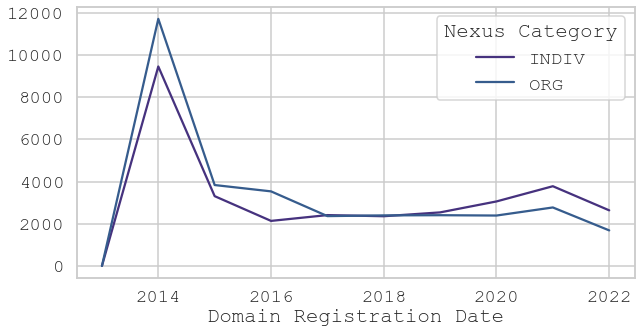

In [73]:
pd.crosstab(registrations['Domain Registration Date'].dt.year, registrations['Nexus Category']).plot(figsize=(10, 5))

---

## **5. Next steps**

In [76]:
# explort data to make data graphic

trends.to_csv('nyc_domain_registration_trends.csv')

***

---